# 5.Building your own digit recognition model

In [207]:
import pandas as pd

In [208]:
df  = pd.read_csv('./data/mnist.csv')

In [209]:
from keras.utils import to_categorical
X = df.iloc[:,1:].as_matrix()
y = to_categorical(df.iloc[:,0:1].as_matrix())

In [210]:
X_train = X[:1600]
y_train = y[:1600]

In [211]:
X_test = X[1600:]
y_test = y[1600:]

## 5.1 Make Simple Model

In [212]:
from keras.layers import Dense
from keras.models import Sequential

In [213]:
# Create the model: model
model = Sequential()

In [214]:
# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(X.shape[1],)))

In [215]:
# Add the second hidden layer
model.add(Dense(50, activation='relu'))

In [216]:
# Add the output layer
model.add(Dense(10, activation='softmax'))

In [217]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [218]:
# Fit the model
model.fit(X_train,y_train,epochs=10, validation_split=.3)

Train on 1120 samples, validate on 480 samples
Epoch 1/10
1120/1120 [==============================] - 2s 2ms/step - loss: 13.7098 - acc: 0.1437 - val_loss: 13.4187 - val_acc: 0.1583
Epoch 2/10
1120/1120 [==============================] - 0s 286us/step - loss: 13.2101 - acc: 0.1759 - val_loss: 13.1835 - val_acc: 0.1812
Epoch 3/10
1120/1120 [==============================] - 0s 272us/step - loss: 13.1749 - acc: 0.1813 - val_loss: 13.2225 - val_acc: 0.1771
Epoch 4/10
1120/1120 [==============================] - 0s 274us/step - loss: 13.1950 - acc: 0.1786 - val_loss: 13.1357 - val_acc: 0.1833
Epoch 5/10
1120/1120 [==============================] - 0s 271us/step - loss: 13.1979 - acc: 0.1795 - val_loss: 13.6794 - val_acc: 0.1479
Epoch 6/10
1120/1120 [==============================] - 0s 278us/step - loss: 13.1253 - acc: 0.1830 - val_loss: 12.3541 - val_acc: 0.2271
Epoch 7/10
1120/1120 [==============================] - 0s 274us/step - loss: 12.4321 - acc: 0.2241 - val_loss: 12.5783 - val_a

## 5.2 Wider and Deeper Network

In [219]:
def make_model(nodes, layers, input_shape, hidden_activation, output_activation):
    model = Sequential()
    model.add(Dense(nodes, activation=hidden_activation, input_shape=input_shape))
    for i in range(layers - 1):
        model.add(Dense(nodes, activation=hidden_activation))
    model.add(Dense(10, activation=output_activation))
    return model

In [220]:
input_shape = X[1].shape

In [221]:
input_shape

(784,)

In [222]:
# 1layers and 50 nodes
model1 = make_model(50, 1 , input_shape, 'relu', 'softmax')
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist1 = model1.fit(X_train,y_train,validation_split=.3, epochs=30, verbose=False)

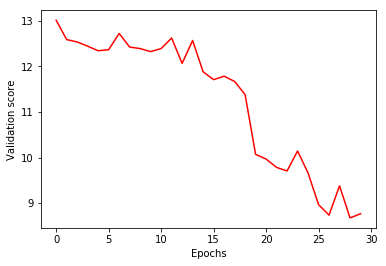

In [223]:
import matplotlib.pyplot as plt

plt.plot(hist1.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [224]:
# 2layer and 50 nodes
model2 = make_model(50, 2, input_shape, 'relu', 'softmax')
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist2 = model2.fit(X_train,y_train,validation_split=.3, epochs=30, verbose=False)

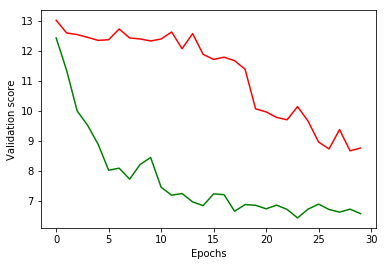

In [225]:
import matplotlib.pyplot as plt

plt.plot(hist1.history['val_loss'], 'r', hist2.history['val_loss'], 'g')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [226]:
# 3layers and 50 nodes
model3 = make_model(50, 3, input_shape, 'relu', 'softmax')
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist3 = model3.fit(X_train,y_train,validation_split=.3, epochs=30, verbose=False)

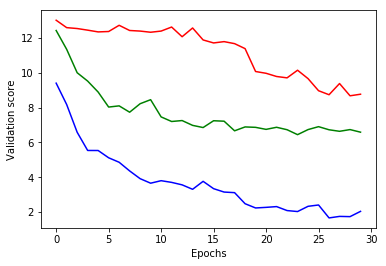

In [227]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['val_loss'], 'r', hist2.history['val_loss'], 'g', hist3.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [228]:
# 4layer and 50 nodes
model4 = make_model(50, 4, input_shape, 'relu', 'softmax')
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist4 = model4.fit(X_train,y_train, validation_split=.3, epochs=30, verbose=False)

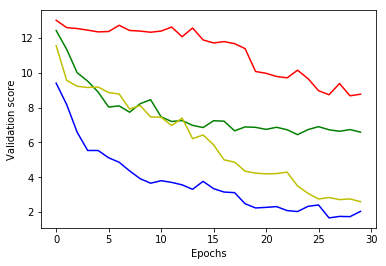

In [229]:
import matplotlib.pyplot as plt

plt.plot(hist1.history['val_loss'], 'r', hist2.history['val_loss'], 'g', hist3.history['val_loss'], 'b', 
         hist4.history['val_loss'], 'y')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [230]:
# 4layer and 100 nodes
model5 = make_model(100, 4, input_shape, 'relu', 'softmax')
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist5 = model5.fit(X_train,y_train,validation_split=.3, epochs=30, verbose=False)

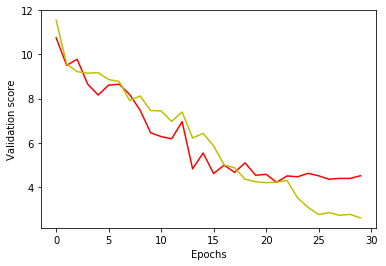

In [231]:
import matplotlib.pyplot as plt

plt.plot(hist5.history['val_loss'], 'r', 
         hist4.history['val_loss'], 'y')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [232]:
# 4layer and 80 nodes
model6 = make_model(80, 4, input_shape, 'relu', 'softmax')
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist6 = model6.fit(X_train,y_train,validation_split=.3, epochs=30, verbose=False)

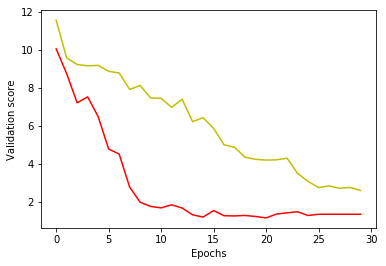

In [233]:
import matplotlib.pyplot as plt

plt.plot(hist6.history['val_loss'], 'r', 
         hist4.history['val_loss'], 'y')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [234]:
# 4layer and 70 nodes
model7 = make_model(70, 4, input_shape, 'relu', 'softmax')
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist7 = model7.fit(X_train,y_train,validation_split=.3, epochs=30, verbose=False)

In [235]:
# 4layer and 60 nodes
model8 = make_model(60, 4, input_shape, 'relu', 'softmax')
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist8 = model8.fit(X_train,y_train,validation_split=.3, epochs=30, verbose=False)

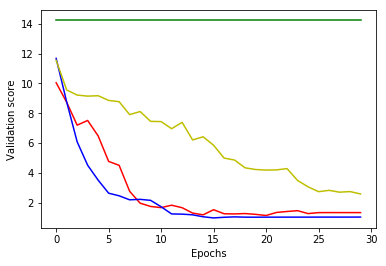

In [236]:
import matplotlib.pyplot as plt

plt.plot(hist6.history['val_loss'], 'r', 
         hist7.history['val_loss'], 'g', 
         hist8.history['val_loss'], 'b', 
         hist4.history['val_loss'], 'y')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [237]:
# 5layer and 70 nodes
model9 = make_model(70, 5, input_shape, 'relu', 'softmax')
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist9 = model9.fit(X_train,y_train,validation_split=.3, epochs=30, verbose=False)

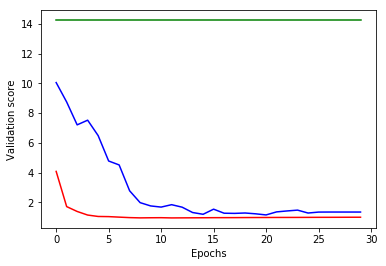

In [238]:
import matplotlib.pyplot as plt

plt.plot(hist9.history['val_loss'], 'r', 
         hist7.history['val_loss'], 'g', 
         hist6.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [239]:
from numpy import argmax

predict_prob1 = model9.predict(X_test)
predict1 = [argmax(i, axis=None, out=None) for i in predict_prob1]

predict_prob2 = model7.predict(X_test)
predict2 = [argmax(i, axis=None, out=None) for i in predict_prob2]

predict_prob3 = model6.predict(X_test)
predict3 = [argmax(i, axis=None, out=None) for i in predict_prob3]


target = [argmax(i, axis=None, out=None) for i in y_test]

In [240]:
from sklearn.metrics import accuracy_score
print("Model6 Accuracy : %2.2f%%" % (accuracy_score(target, predict3) * 100.0))
print("Model7 Accuracy : %2.2f%%" % (accuracy_score(target, predict2) * 100.0))
print("Model9 Accuracy : %2.2f%%" % (accuracy_score(target, predict1) * 100.0))

Model6 Accuracy : 88.50%
Model7 Accuracy : 7.75%
Model9 Accuracy : 79.50%
